In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline


Not including this in the final results because of my lack of experience to fully understand logistic regression. 

In [44]:
df = pd.read_csv("generated_data/final_df.csv")
df.head()

,client_id,entity_type,entity_year_established,transaction_id,contract_id,payment_amt,payment_code,transaction_date_dt,transaction_year,transaction_month,transaction_date,transaction_day,transaction_time,transaction_hour,years_from_establishment,month_year
0,786,Australian Private Company,2002,25555,729,40.0,PAYMENT,2018-07-24 18:08:10,2018,7,2018-07-24,24,18:08:10,18,16,2018-07
1,786,Australian Private Company,2002,16056,729,40.0,PAYMENT,2018-03-28 17:08:24,2018,3,2018-03-28,28,17:08:24,17,16,2018-03
2,786,Australian Private Company,2002,25554,729,250.0,PAYMENT,2018-07-24 18:08:10,2018,7,2018-07-24,24,18:08:10,18,16,2018-07
3,786,Australian Private Company,2002,20593,729,250.0,PAYMENT,2018-05-28 18:08:32,2018,5,2018-05-28,28,18:08:32,18,16,2018-05
4,786,Australian Private Company,2002,8657,729,250.0,PAYMENT,2017-11-28 17:08:13,2017,11,2017-11-28,28,17:08:13,17,15,2017-11


If we are talking about identifying the dominant factor, the following columns cannot be used for fitting:
1. client_id 
2. contract_id
3. transaction_id

These factors cannot possibly impact the default. Also, these might be computationally taxing because of the number of unique values they have.

In [45]:
df1 = df.copy()

In [46]:
df1['intercept'] = 1

In [47]:
df1[['default','payment']] = pd.get_dummies(df1['payment_code'])
df1.head()

,client_id,entity_type,entity_year_established,transaction_id,contract_id,payment_amt,payment_code,transaction_date_dt,transaction_year,transaction_month,transaction_date,transaction_day,transaction_time,transaction_hour,years_from_establishment,month_year,intercept,default,payment
0,786,Australian Private Company,2002,25555,729,40.0,PAYMENT,2018-07-24 18:08:10,2018,7,2018-07-24,24,18:08:10,18,16,2018-07,1,0,1
1,786,Australian Private Company,2002,16056,729,40.0,PAYMENT,2018-03-28 17:08:24,2018,3,2018-03-28,28,17:08:24,17,16,2018-03,1,0,1
2,786,Australian Private Company,2002,25554,729,250.0,PAYMENT,2018-07-24 18:08:10,2018,7,2018-07-24,24,18:08:10,18,16,2018-07,1,0,1
3,786,Australian Private Company,2002,20593,729,250.0,PAYMENT,2018-05-28 18:08:32,2018,5,2018-05-28,28,18:08:32,18,16,2018-05,1,0,1
4,786,Australian Private Company,2002,8657,729,250.0,PAYMENT,2017-11-28 17:08:13,2017,11,2017-11-28,28,17:08:13,17,15,2017-11,1,0,1


In [48]:
df1.drop(columns = ['payment', 'client_id', 'transaction_id', 'contract_id'], inplace=True)
df1.tail()

,entity_type,entity_year_established,payment_amt,payment_code,transaction_date_dt,transaction_year,transaction_month,transaction_date,transaction_day,transaction_time,transaction_hour,years_from_establishment,month_year,intercept,default
25552,Australian Private Company,2001,80.0,PAYMENT,2018-07-23 18:08:08,2018,7,2018-07-23,23,18:08:08,18,17,2018-07,1,0
25553,Australian Private Company,2001,500.0,PAYMENT,2018-04-23 18:08:29,2018,4,2018-04-23,23,18:08:29,18,17,2018-04,1,0
25554,Australian Private Company,2001,80.0,PAYMENT,2017-10-26 17:08:14,2017,10,2017-10-26,26,17:08:14,17,16,2017-10,1,0
25555,Australian Private Company,2001,500.0,PAYMENT,2018-03-25 17:08:27,2018,3,2018-03-25,25,17:08:27,17,17,2018-03,1,0
25556,Australian Private Company,2001,80.0,PAYMENT,2018-04-23 18:08:29,2018,4,2018-04-23,23,18:08:29,18,17,2018-04,1,0


In [49]:
df1.payment_amt.nunique()

904

(array([9.2000e+01, 0.0000e+00, 1.0000e+00, 1.6000e+01, 1.4480e+03,
        1.0075e+04, 9.5630e+03, 3.4970e+03, 7.9500e+02, 7.0000e+01]),
 array([-2.        , -1.26989699, -0.53979398,  0.19030903,  0.92041204,
         1.65051505,  2.38061806,  3.11072107,  3.84082408,  4.57092709,
         5.3010301 ]),
 <BarContainer object of 10 artists>)

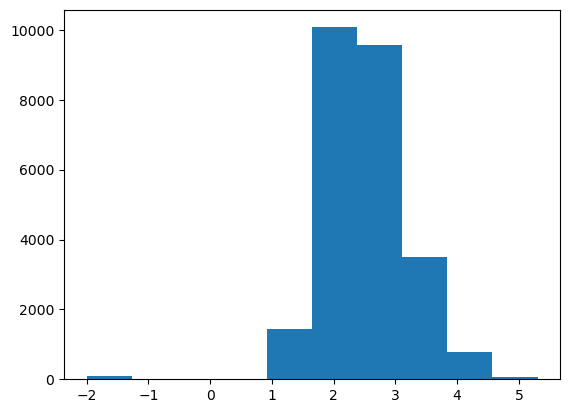

In [50]:
plt.hist(np.log10(df['payment_amt']))

In [51]:
df1.payment_amt.describe()

count     25557.000000
mean       1221.558777
std        4346.203781
min           0.010000
25%          93.330000
50%         266.660000
75%         833.330000
max      200000.050000
Name: payment_amt, dtype: float64

In [52]:
# cond = (df1['payment_amt'] > Lower_Fence) & df1['payment_amt'] < Q1
df1['payment_amt_category'] = 1
cond = df['payment_amt'] < 93.33
df1.loc[cond, 'payment_amt_category'] = 'Category1'
cond = (df1['payment_amt'] > 93.33) & (df1['payment_amt'] < 266.66)
df1.loc[cond, 'payment_amt_category'] = 'Category2'
cond = (df1['payment_amt'] > 266.66) & (df1['payment_amt'] < 833.33)
df1.loc[cond, 'payment_amt_category'] = 'Category3'
cond = (df1['payment_amt'] > 833.33) 
df1.loc[cond, 'payment_amt_category'] = 'Category4'

In [53]:
df1.payment_amt_category.value_counts()

Category1    6169
Category4    5861
Category2    5735
Category3    5726
1            2066
Name: payment_amt_category, dtype: int64

In [56]:
df1.columns

Index(['entity_type', 'entity_year_established', 'payment_amt', 'payment_code',
       'transaction_date_dt', 'transaction_year', 'transaction_month',
       'transaction_date', 'transaction_day', 'transaction_time',
       'transaction_hour', 'years_from_establishment', 'month_year',
       'intercept', 'default', 'payment_amt_category'],
      dtype='object')

# Effect of payment amount

In [61]:
df1.head()

,entity_type,entity_year_established,payment_amt,payment_code,transaction_date_dt,transaction_year,transaction_month,transaction_date,transaction_day,transaction_time,transaction_hour,years_from_establishment,month_year,intercept,default,payment_amt_category
0,Australian Private Company,2002,40.0,PAYMENT,2018-07-24 18:08:10,2018,7,2018-07-24,24,18:08:10,18,16,2018-07,1,0,Category1
1,Australian Private Company,2002,40.0,PAYMENT,2018-03-28 17:08:24,2018,3,2018-03-28,28,17:08:24,17,16,2018-03,1,0,Category1
2,Australian Private Company,2002,250.0,PAYMENT,2018-07-24 18:08:10,2018,7,2018-07-24,24,18:08:10,18,16,2018-07,1,0,Category2
3,Australian Private Company,2002,250.0,PAYMENT,2018-05-28 18:08:32,2018,5,2018-05-28,28,18:08:32,18,16,2018-05,1,0,Category2
4,Australian Private Company,2002,250.0,PAYMENT,2017-11-28 17:08:13,2017,11,2017-11-28,28,17:08:13,17,15,2017-11,1,0,Category2


In [62]:
log_reg = sm.Logit(df1['default'], df1[['intercept', 'payment_amt']])
log_reg_result = log_reg.fit()
log_reg_result.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverti

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Logit
=============================================================
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: default          AIC:              inf   
Date:               2023-03-22 15:42 BIC:              inf   
No. Observations:   25557            Log-Likelihood:   -inf  
Df Model:           1                LL-Null:          0.0000
Df Residuals:       25555            LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     8.0000                                   
-------------------------------------------------------------
              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------
intercept    -2.2831   0.0239 -95.4665 0.0000 -2.3300 -2.2362
payment_amt  -0.0001   0.0000  -6.1958 0.0000 -0.0001 -0.0001
=============================================================

"""

# All factors combined

In [64]:
log_reg = sm.Logit(df1['default'], df1[['intercept', 'entity_year_established', 'payment_amt', 'transaction_year', 'years_from_establishment']])
log_reg_result = log_reg.fit()
log_reg_result.summary2()

         Current function value: inf
         Iterations: 35


/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/msp/opt/anaconda3/envs/datasci/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                    Logit                 Pseudo R-squared:      inf   
Dependent Variable:       default               AIC:                   inf   
Date:                     2023-03-22 15:44      BIC:                   inf   
No. Observations:         25557                 Log-Likelihood:        -inf  
Df Model:                 4                     LL-Null:               0.0000
Df Residuals:             25552                 LLR p-value:           1.0000
Converged:                0.0000                Scale:                 1.0000
No. Iterations:           35.0000                                            
-----------------------------------------------------------------------------
                           Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------------------
intercept                -256.5324  92.2890 -2.7797 0.0054 -437.4156 -75.6492
entity_year_established     0.0720      nan     nan    nan       nan      nan
payment_amt                -0.0001   0.0000 -6.1639 0.0000   -0.0001  -0.0001
transaction_year            0.0542      nan     nan    nan       nan      nan
years_from_establishment    0.0365      nan     nan    nan       nan      nan
=============================================================================

"""